 # Preprocessing

 I'm using the Gensim - Topic Modeling for Humans library to both get the Coherence of the models based of the parameters, and to build the model.

 

In [1]:

import pickle #To store lists

from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary
from gensim.models import LdaModel
import matplotlib.pyplot as plt
###
# from google.colab import drive
import spacy
import gensim
import pandas as pd
spacy.cli.download("en_core_web_md")
nlp = spacy.load('en_core_web_md')

# from google.colab import drive
# drive.mount('/content/gdrive')

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [2]:
FROM_DRIVE = False

def round_up(n, decimals=0):
    multiplier = 10 ** decimals
    return math.ceil(n * multiplier) / multiplier

if FROM_DRIVE:
  
  sheet_id = "12V2euXZRC9uSeRyWUZNSV8A2LBfGSbSUpfTo6hdkMBU"
  sheet_name = "spacenews"
  url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
  DataSet = pd.read_csv(url)
else:
  DataSet = pd.read_csv('spacenews_tittle_and_content - spacenews.csv')

DataSet


title  \
0      Astrocast buying Hiber to boost funding and ex...   
1      Sierra Space to partner with Spirit AeroSystem...   
2      Rocket to launch China’s next space station mo...   
3      Against Quad? China launches satellite-based E...   
4      House committee questions proposed delay in NA...   
...                                                  ...   
17469  Kendall lays out Pentagon thinking on future s...   
17470  A larger share of NOAA’s declining space budge...   
17471  Think Tank Turns Its Attention To Mars As 2016...   
17472  House Bill Leaves Last Three JPSS Satellites i...   
17473  Championing a Climate Change for Commercial We...   

                                                 content  
0      TAMPA, Fla. — Cash-strapped smallsat operator ...  
1      WASHINGTON — Sierra Space announced May 31 a s...  
2      HELSINKI — A Long March 5B rocket has arrived ...  
3      SEOUL, South Korea — In what appears to be a t...  
4      WASHINGTON — Members of the House Science Comm...  
...                                                  ...  
17469  \nFrank Kendall, the Pentagon’s top acquisitio...  
17470  Updated Feb. 10 at 10:18 p.m. Eastern The U.S....  
17471  WASHINGTON — As NASA develops a long-term stra...  
17472  WASHINGTON — A spending bill the House passed ...  
17473  U.S. Rep. Jim Bridenstine (R-Okla.) is a growi...  

[17474 rows x 2 columns]

In [3]:
DataSet = DataSet.dropna()
unspliteddocuments = DataSet['content'].values.tolist()
documents = []
for i in unspliteddocuments:
    documents.append(i.split())
# documents
avrage = 0
maximum = [0,""]
minimum = [0,""]
maximumCount = len(documents[0])
minimumCount = len(documents[0])

for i,content in enumerate(documents):
    avrage = avrage + len(content)
    if len(content) > maximumCount:
        maximumCount = len(content)
        maximum[0] = i
        maximum[1] = content
    if len(content) < minimumCount and len(content) > 10:
        minimumCount = len(content)
        minimum[0] = i
        minimum[1]= content

avrage = avrage / len(documents)


print(f'Number of documents in my collection: {len(documents)}')
print()
print(f'The avrage number of words in my collection {avrage}')
print()
print(f'Longest document of my collection has {maximumCount} words: ' + str(maximum[1][:20]) + '... continues')
print()
print(f'Shortest document of my collection has {minimumCount} words: ' + str(minimum))


Number of documents in my collection: 17303

The avrage number of words in my collection 632.8473675085245

Longest document of my collection has 6558 words: ['The', 'drama', 'and', 'uncertainty', 'surrounding', 'the', 'U.S.', 'government', 'launch', 'enterprise', 'and', 'its', 'incumbent', 'provider,', 'United', 'Launch', 'Alliance,', 'in', '2015', 'stood']... continues

Shortest document of my collection has 11 words: [13020, ['RESOURCES', 'NASA’s', 'Strategic', 'Direction', 'and', 'the', 'Need', 'for', 'a', 'National', 'Consensus']]


In [43]:
new_docs = []
for i,doc in enumerate(unspliteddocuments):

    clean = " ".join(word for word in gensim.utils.simple_preprocess(doc, min_len = 4))
    # removing stop words, digits, the words [will, say, said, going],
    tdoc=nlp(clean)
    stops_and_digits_removed  = " ".join(token.lemma_ for token in tdoc if not token.is_stop and not token.is_digit and not token.text == 'will' and not token.text == 'say' and not token.text == 'said' and not token.text == 'going' and token.lemma_ != '-PRON-' and token.pos_ in ['NOUN','PROPN'])
   
    new_docs.append(stops_and_digits_removed)

In [44]:
with open("test", "wb") as fp:   #Pickling
    pickle.dump(new_docs, fp)


In [4]:
with open("test", "rb") as fp:   # Unpickling
    new_docs_from_storage = pickle.load(fp)
new_docs = new_docs_from_storage

In [3]:
unspliteddocuments[51]

NameError: name 'unspliteddocuments' is not defined

In [5]:
new_docs[0]

'cash operator astrocast plan dutch connectivity solution provider hiber plan constellation year failure satellite switzerland astrocast deal spectrum americas constellation internet thing device astrocast plan issue share fund acquisition hiber astrocast stock market year startup term funding needs astrocast euro listing share euronext growth paris junior stock market france startup fund constellation satellite test spacecraft coverage astrocast satellite earth orbit unit cubesats astrocast model unit cubesat astrocast company august share euronext growth oslo norway operator february region americas astrocast spokesperson fatima vigil perez service hour latency astrocast report franc expansion plan coverage satellite revisit rate company franc loss operator startup spacex swarm share space market satellite device network astrocast service customer market agriculture maritime utility customer mining logistic agriculture market satellite device solution customer track asset location co

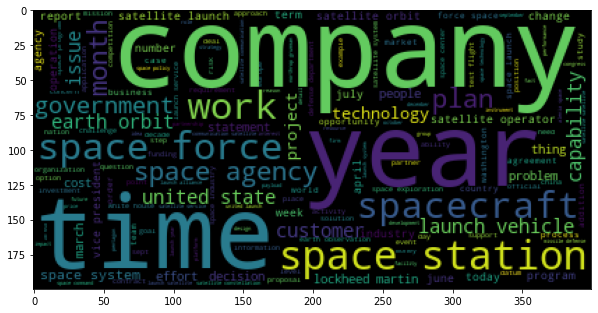

In [5]:
import matplotlib.pyplot as plt
import wordcloud as wc
colls= ''
tokens = []
for i, thing in enumerate(new_docs):
    tokens.append(thing.split(" "))

for d in tokens:
    collect = " ".join([w for w in d])
    colls = colls + " "+collect
colls

myCloud = wc.WordCloud().generate(colls)
plt.figure(figsize=(10,10))
plt.imshow(myCloud)

In [6]:
dtoken=[gensim.utils.simple_preprocess(d, deacc= True, min_len=4) for d in new_docs] 
print('Building bigrams')
from gensim.models.phrases import Phrases, Phraser
phrases = Phrases(dtoken, min_count = 2,threshold=9)
bigram=Phraser(phrases)
bdocs=[bigram[d] for d in dtoken]

Building bigrams


In [50]:
[print(d) for d in bdocs]
for d in bdocs:
  for w in d:
    if '_' in w:
      print(w)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



earth_orbit
james_webb
french_guiana
readiness_date
asia_pacific
head_sales
asia_pacific
noise_vibration
northrop_grumman
facility_southern
french_guiana
panama_canal
french_guiana
daniel_neuenschwander
component_supplier
ground_station
laser_communication
earth_orbit
barry_matsumori
laser_communication
point_point
point_multipoint
laser_communication
data_rate
laser_communication
micro_david
ground_station
national_harbor
supply_chain
consumer_electronic
supply_chain
panel_discussion
jean_marc
nasr_executive
vice_president
frank_demauro
vice_president
northrop_grumman
halo_module
lunar_gateway
supply_chain
ryan_reid
supply_chain
supply_chain
supply_chain
nasr_airbus
supply_chain
chris_johnson
vice_president
maxar_technology
agility_flexibility
vice_president
alenia_space
chief_executive
manufacturer_nanoavionic
national_harbor
internet_thing
alexandre_tisserant
peter_beck
chief_executive
phone_interview
bulk_purchase
altitude_kilometer
electron_kick
kick_stage
earth_orbit
covid_restri

artemis_program
human_moon
artemis_program
ellen_lord
lord_undersecretary
acquisition_sustainment
pain_point
firm_quilty
quilty_analytic
virgin_orbit
quilty_analytic
aperture_radar
earth_orbit
internet_thing
business_model
quilty_analytic
internet_thing
softbank_oneweb
revenue_profit
alex_clavel
tech_conglomerate
whayne_oneweb
chapter_protection
whayne_oneweb
coronaviru_crisis
janice_vice
spacenew_webinar
claude_rousseau
softbank_oneweb
oneweb_bankruptcy
matt_connell
internet_access
user_terminal
array_antenna
user_terminal
user_terminal
samer_halawi
value_proposition
airplane_ship
band_frequency
spectrum_license
alexandre_vallet
department_bureau
band_downlink
spectrum_license
charlie_ergen
fleet_operators
echostar_dish
oneweb_bankruptcy
elon_musk
iridium_globalstar
orbcomm_teledesic
equity_debt
chapter_bankruptcy
oneweb_bankruptcy
signal_converter
oneweb_bankruptcy
oneweb_bankruptcy
panel_antenna
longtime_critic
issue_spacenews
laurel_jersey
norway_netherlands
earth_orbit
royal_nethe

launch_alliance
panel_discussion
american_astronautical
society_wernher
braun_symposium
john_elbon
operating_officer
tory_bruno
president_chief
origin_glenn
clay_mowry
vice_president
sale_marketing
business_luncheon
northrop_grumman
john_steinmeyer
northrop_grumman
braun_symposium
fire_test
industry_source
raptor_engine
falcon_rocket
caleb_henry
panel_antenna
antenna_maker
dave_helfgott
flat_panel
startup_phasor
mountain_view
dish_antenna
vice_president
garden_variety
aperture_terminal
piece_metal
panel_antenna
dish_antenna
panel_antenna
dish_antenna
panel_antenna
university_waterloo
israel_gilat
panel_antennas
radio_frequency
panel_antenna
panel_antenna
couple_dollar
price_point
consumer_terminal
vice_president
palo_alto
panel_antenna
dish_antenna
earth_orbit
dish_dish
geostationary_orbit
panel_antenna
dish_antenna
earth_orbit
kind_stuff
bull_consultant
signal_converter
north_carolina
vice_president
panel_antenna
isotropic_system
darmstadt_germany
alcan_system
panel_antenna
consumer_g

streaming_service
order_book
seatback_screen
budget_proposal
york_times
aerojet_rocketdyne
huntsville_alabama
southern_california
center_excellence
stock_exchange
percent_trading
harris_caprock
global_eagle
paul_rainey
global_eagle
dave_davis
rainey_global
funding_round
filing_security
exchange_commission
kymeta_panel
degree_east
laser_communication
asteroid_mining
resource_asteroids
spaceresources_initiative
minister_etienne
united_states
press_conference
saturn_moon
water_surface
jupiter_moon
subsurface_ocean
aerojet_rocketdyne
aerojet_rocketdyne
cost_saving
eileen_drake
president_chief
aerojet_rocketdyne
rancho_cordova
aerojet_rocketdyne
huntsville_alabama
facility_southern
center_excellence
parent_company
aerojet_rocketdyne
segundo_california
aerojet_rocketdyne
aerojet_rocketdyne
launch_alliance
symposium_colorado
test_firing
stage_engine
west_texas
executive_tory
aerojet_rocketdyne
engine_aerojet
security_exchange
harris_caprock
paul_rainey
connectivity_provider
global_eagle
chief

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [7]:
dictionary=Dictionary(bdocs)
print(dictionary)
dictionary.filter_extremes(keep_n = 5000, no_above= 0.8, no_below = len(bdocs)*.01) # no_below 1%
print(dictionary)
corpus_bof=[dictionary.doc2bow(d) for d in bdocs]

Dictionary<56594 unique tokens: ['access', 'acquisition', 'agreement', 'agriculture', 'agriculture_maritime']...>
Dictionary<1503 unique tokens: ['access', 'acquisition', 'agreement', 'america', 'asset']...>


# Applying

## Bag of words

In [8]:
K=[12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32]
cv=[]
vocab = list(dictionary.values())
print('# of docs: %5d # of words: %6d'%(dictionary.num_docs, len(vocab)))
for k in K:
    lda = LdaModel(corpus = corpus_bof,num_topics= k, random_state= 27644437, id2word = dictionary, alpha = "asymmetric", eta= "symmetric",per_word_topics = True,passes = 100)
    lda_cv = CoherenceModel(model=lda, texts= bdocs, dictionary=dictionary, coherence='c_v')
    cv_cohe=lda_cv.get_coherence()
    print('K: %2d coherence: %.3f'%(k, cv_cohe))
    cv.append(cv_cohe)

# of docs: 17303 # of words:   1503
K: 12 coherence: 0.481
K: 13 coherence: 0.475
K: 14 coherence: 0.491
K: 15 coherence: 0.478
K: 16 coherence: 0.471
K: 17 coherence: 0.487
K: 18 coherence: 0.485
K: 19 coherence: 0.487
K: 20 coherence: 0.488
K: 21 coherence: 0.484
K: 22 coherence: 0.486
K: 23 coherence: 0.477
K: 24 coherence: 0.485
K: 25 coherence: 0.481
K: 26 coherence: 0.492
K: 27 coherence: 0.486
K: 28 coherence: 0.480
K: 29 coherence: 0.485
K: 30 coherence: 0.493
K: 31 coherence: 0.488
K: 32 coherence: 0.489


In [ ]:
# of docs:   200 # of words:   2506
K:  5 coherence: 0.366
K: 10 coherence: 0.382
K: 15 coherence: 0.383
K: 20 coherence: 0.390
K: 25 coherence: 0.401
K: 30 coherence: 0.398
K: 35 coherence: 0.413
K: 40 coherence: 0.415
K: 45 coherence: 0.407
K: 50 coherence: 0.408
K: 55 coherence: 0.397
K: 60 coherence: 0.378
K: 65 coherence: 0.411
K: 70 coherence: 0.391
K: 80 coherence: 0.415
K: 85 coherence: 0.408
K: 90 coherence: 0.417
K: 95 coherence: 0.386
        
# of docs:    10 # of words:    634
K:  5 coherence: 0.474
K: 10 coherence: 0.576
K: 15 coherence: 0.608
K: 20 coherence: 0.568
K: 25 coherence: 0.603
K: 30 coherence: 0.532
K: 35 coherence: 0.576
K: 40 coherence: 0.607
K: 45 coherence: 0.574
K: 50 coherence: 0.535
K: 55 coherence: 0.566
K: 60 coherence: 0.556
K: 65 coherence: 0.565
K: 70 coherence: 0.564
K: 75 coherence: 0.577
K: 80 coherence: 0.584
K: 85 coherence: 0.577
K: 90 coherence: 0.549
K: 95 coherence: 0.570
K: 100 coherence: 0.566
        
# of docs: 17303 # of words:   1503
K:  7 coherence: 0.441
K:  8 coherence: 0.461
K:  9 coherence: 0.478
K: 10 coherence: 0.486
K: 11 coherence: 0.486
        
# of docs: 17303 # of words:   1503
K: 12 coherence: 0.481
K: 13 coherence: 0.475
K: 14 coherence: 0.491
K: 15 coherence: 0.478
K: 16 coherence: 0.471
K: 17 coherence: 0.487
K: 18 coherence: 0.485
K: 19 coherence: 0.487
K: 20 coherence: 0.488
K: 21 coherence: 0.484
K: 22 coherence: 0.486
K: 23 coherence: 0.477
K: 24 coherence: 0.485
K: 25 coherence: 0.481
K: 26 coherence: 0.492
K: 27 coherence: 0.486
K: 28 coherence: 0.480
K: 29 coherence: 0.485
K: 30 coherence: 0.493
K: 31 coherence: 0.488
K: 32 coherence: 0.489

IndentationError: ignored

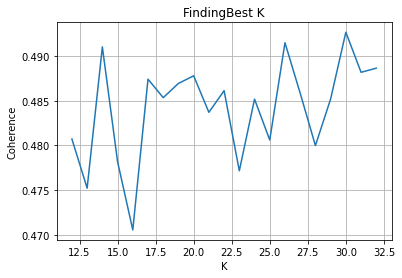

In [9]:
## With 200 docs: 
# K=[]
# cv=[]
fig, ax = plt.subplots()
ax.plot(K, cv
)

ax.set(xlabel='K', ylabel='Coherence',
       title='FindingBest K')
ax.grid()

fig.savefig("test.png")
plt.show()

In [10]:
# Best: K: 10 alfa: asymmetric beta:  symmetric passes: 100
K = 20
lda = LdaModel(corpus = corpus_bof,num_topics= K, random_state= 27644437, id2word = dictionary, alpha = "asymmetric", eta= "symmetric",per_word_topics = True,passes = 100)

In [11]:
lda_cv = CoherenceModel(model=lda, texts= bdocs, dictionary=dictionary, coherence='c_v')
cv_cohe=lda_cv.get_coherence()
print('K: %2d coherence: %.3f'%(k, cv_cohe))

K: 32 coherence: 0.488


In [12]:
lda.print_topics()

# lda.get_document_topic

[(0,
  '0.185*"satellite" + 0.076*"orbit" + 0.047*"payload" + 0.046*"spacecraft" + 0.033*"mission" + 0.030*"launch" + 0.021*"technology" + 0.019*"year" + 0.018*"cubesat" + 0.017*"kilogram"'),
 (1,
  '0.115*"launch" + 0.067*"rocket" + 0.063*"engine" + 0.050*"vehicle" + 0.024*"cost" + 0.022*"united" + 0.022*"force" + 0.021*"year" + 0.021*"launch_alliance" + 0.021*"mission"'),
 (2,
  '0.116*"contract" + 0.064*"company" + 0.030*"boeing" + 0.025*"award" + 0.024*"program" + 0.020*"competition" + 0.017*"work" + 0.015*"system" + 0.014*"lockheed_martin" + 0.014*"agency"'),
 (3,
  '0.091*"system" + 0.076*"satellite" + 0.037*"program" + 0.033*"force" + 0.021*"defense" + 0.020*"capability" + 0.019*"missile" + 0.018*"communication" + 0.016*"ground" + 0.016*"year"'),
 (4,
  '0.159*"force" + 0.035*"service" + 0.030*"command" + 0.023*"pentagon" + 0.019*"defense" + 0.016*"operation" + 0.015*"acquisition" + 0.014*"security" + 0.011*"capability" + 0.010*"congress"'),
 (5,
  '0.120*"satellite" + 0.049*"se

In [13]:

topics = lda.print_topics()

for i in range(K):
  
    print("Topic", i, end=' => ')
    
    print(topics[i][1], end =' ')
    
    print()


new_topics = [[] for i in range(K)]

for i in range(K):
    oldtopic = topics[i][1]
    tag = False
    new_word = ""
    for j in oldtopic:
        if j == "\"" and tag == False:
            tag = True
        elif j == "\"" and tag == True:
            tag = False
            new_topics[i].append(new_word)
            new_word = ""
        if tag == True and j != "\"":
            new_word += j        


print()  
print()
for i in range(K):
    print("Topic", i, end=' => ')
    print(new_topics[i], end =' ')
    print()

from tabulate import tabulate

print(tabulate(new_topics, headers=[">>>>>>>",">>>>>>>",">>>>>>>",">>>>>>>",">>>>>>>",">>>>>>>",">>>>>>>",">>>>>>>",">>>>>>>",">>>>>>>",]))

Topic 0 => 0.185*"satellite" + 0.076*"orbit" + 0.047*"payload" + 0.046*"spacecraft" + 0.033*"mission" + 0.030*"launch" + 0.021*"technology" + 0.019*"year" + 0.018*"cubesat" + 0.017*"kilogram" 
Topic 1 => 0.115*"launch" + 0.067*"rocket" + 0.063*"engine" + 0.050*"vehicle" + 0.024*"cost" + 0.022*"united" + 0.022*"force" + 0.021*"year" + 0.021*"launch_alliance" + 0.021*"mission" 
Topic 2 => 0.116*"contract" + 0.064*"company" + 0.030*"boeing" + 0.025*"award" + 0.024*"program" + 0.020*"competition" + 0.017*"work" + 0.015*"system" + 0.014*"lockheed_martin" + 0.014*"agency" 
Topic 3 => 0.091*"system" + 0.076*"satellite" + 0.037*"program" + 0.033*"force" + 0.021*"defense" + 0.020*"capability" + 0.019*"missile" + 0.018*"communication" + 0.016*"ground" + 0.016*"year" 
Topic 4 => 0.159*"force" + 0.035*"service" + 0.030*"command" + 0.023*"pentagon" + 0.019*"defense" + 0.016*"operation" + 0.015*"acquisition" + 0.014*"security" + 0.011*"capability" + 0.010*"congress" 
Topic 5 => 0.120*"satellite" + 0

In [14]:
for i in range (1000):
  print(i, lda.get_document_topics(corpus_bof[i], minimum_probability=0.3))
# lda.get_document_topics(corpus_bof[33], minimum_probability=0)

0 [(5, 0.46616977), (19, 0.34273654)]
1 [(18, 0.36956564)]
2 [(13, 0.37525684), (18, 0.31166682)]
3 [(10, 0.53214806)]
4 [(8, 0.31871587), (9, 0.5908852)]
5 [(8, 0.5470287), (16, 0.32171252)]
6 [(1, 0.4527436), (2, 0.30516666)]
7 []
8 [(13, 0.40016833), (18, 0.4898532)]
9 [(18, 0.57688195)]
10 []
11 [(5, 0.6726836)]
12 [(14, 0.33639094)]
13 []
14 [(5, 0.60885674)]
15 [(0, 0.50964016)]
16 [(19, 0.69183975)]
17 [(11, 0.6799528)]
18 [(0, 0.5047309)]
19 [(11, 0.39142433)]
20 [(18, 0.5977592)]
21 [(5, 0.7137328)]
22 [(13, 0.3886847)]
23 [(14, 0.4338345)]
24 [(15, 0.6530723)]
25 [(1, 0.494713)]
26 [(11, 0.5127352)]
27 []
28 [(2, 0.30685413)]
29 [(19, 0.3213984)]
30 [(3, 0.43298692)]
31 [(5, 0.76917005)]
32 [(14, 0.42224032)]
33 []
34 [(10, 0.5759344)]
35 [(8, 0.4330642)]
36 []
37 [(18, 0.85105973)]
38 []
39 [(14, 0.30334747)]
40 [(10, 0.4753029)]
41 [(9, 0.5806822)]
42 [(4, 0.326364), (14, 0.34784684)]
43 [(1, 0.3837288), (18, 0.43748906)]
44 [(13, 0.40445843), (18, 0.39220607)]
45 [(18, 0.8

427 [(9, 0.42336035)]
428 [(15, 0.36123228)]
429 [(19, 0.32581663)]
430 [(9, 0.36385542)]
431 []
432 [(14, 0.46771726)]
433 [(9, 0.60935205)]
434 [(19, 0.62107915)]
435 [(3, 0.60290384)]
436 []
437 [(5, 0.33543763)]
438 [(13, 0.76764107)]
439 []
440 []
441 [(19, 0.3786211)]
442 [(0, 0.32502478)]
443 [(11, 0.32615286)]
444 [(5, 0.40598753)]
445 [(3, 0.45847213), (4, 0.49299273)]
446 [(5, 0.48215204)]
447 []
448 [(13, 0.3155222)]
449 [(10, 0.39723715)]
450 [(1, 0.5494303)]
451 [(3, 0.49163806), (4, 0.3291433)]
452 [(18, 0.5138233)]
453 []
454 [(18, 0.59513074)]
455 [(5, 0.3249597)]
456 [(14, 0.36485872)]
457 [(0, 0.39464995)]
458 [(13, 0.31559727)]
459 [(5, 0.309257)]
460 [(10, 0.3537275), (13, 0.32589647)]
461 []
462 [(10, 0.32566053), (17, 0.35801613)]
463 [(17, 0.48857176)]
464 []
465 [(3, 0.30031264)]
466 []
467 [(3, 0.4805863)]
468 []
469 [(10, 0.6205119)]
470 [(18, 0.63463366)]
471 [(13, 0.3634415)]
472 []
473 [(5, 0.36142442), (13, 0.41114014)]
474 [(5, 0.43794477)]
475 [(13, 0.35

859 [(0, 0.31212154), (7, 0.40799537)]
860 []
861 [(0, 0.3729652)]
862 []
863 [(0, 0.3131667)]
864 [(3, 0.34609133), (4, 0.48890176)]
865 [(18, 0.70023197)]
866 [(1, 0.34070146)]
867 []
868 [(1, 0.74819934)]
869 [(9, 0.3940589)]
870 [(18, 0.3462281)]
871 [(5, 0.35045376), (13, 0.4284129)]
872 [(1, 0.37375757), (16, 0.33558318)]
873 [(4, 0.36387646), (15, 0.46391797)]
874 [(5, 0.62041485)]
875 [(15, 0.564113)]
876 [(15, 0.7245866)]
877 [(13, 0.3530015)]
878 [(18, 0.50069875)]
879 [(3, 0.5501542)]
880 []
881 [(19, 0.5104847)]
882 [(11, 0.34198534)]
883 [(4, 0.62564796)]
884 [(15, 0.41983116)]
885 [(11, 0.68212295)]
886 []
887 [(5, 0.41556713)]
888 []
889 [(16, 0.61865866)]
890 [(18, 0.84373534)]
891 []
892 [(8, 0.47671255), (13, 0.34102827)]
893 [(8, 0.62469053)]
894 [(0, 0.36746687)]
895 [(13, 0.5159237)]
896 [(5, 0.35692233)]
897 [(5, 0.34311616)]
898 []
899 []
900 []
901 [(13, 0.7903354)]
902 [(18, 0.36905572)]
903 []
904 [(8, 0.60779196)]
905 [(8, 0.59153473)]
906 [(0, 0.41985306)]
9

In [15]:
new_docs[51]

'washington nasa input objective exploration effort agency leadership effort guide activity decade nasa level objective mars exploration campaign agency input objective website objective sentence category transportation habitation infrastructure operation science example system crew orbit surface duration entry descent landing system crew cargo surface nasa request information approach effort announcement feedback stakeholder worship june industry academia july organization guidepost decade program technology line work nasa deputy administrator melroy objective speech human mars summit thing mars target feedback objective procurement activity consensus thing release list objective space community effort nasa term strategy space exploration roller coaster ride goal approach space exploration initiative kurt spud vogel director space architectures nasa minute video agency nasa capability approach decade advance resource approach purpose term strategy agency shift objective approach objec